<strong><b><font size="6">NLP_preprocessing_Lab1</font></b></strong>

#add your Name
<strong><b><font size="4">Name : .........................</font></b></strong>

<h1>To do tasks <span class="tocSkip"></span></h1>
    <li> Lower casing
    <li> Punctuation removal
    <li> Identifying and Remove Stop Words
    <li> Tokenize Text in Words
    <li> NLTK Word Stemming
    <li> Build a bag-of-words
    <li> Create Term Frequency-Inverse Document Frequency (TF-IDF)
    <li> Bag of words
  

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Download and Inspect the IMDB Movie Reviews Dataset
- Labeled movie reviews data as either positive or negative reviews
- We can download the __movie_reviews__ package using the nltk.download function:

In [2]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [3]:
from nltk.corpus import movie_reviews

In [4]:
len(movie_reviews.fileids())

2000

In [5]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [6]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

- __fileids__ can also filter the available files based on their category, which is the name of the subfolders they are located in. Therefore we can have lists of positive and negative reviews separately.

In [7]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [8]:
negative_fileids

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [9]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

- We can inspect one of the reviews using the raw method of movie_reviews, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

In [10]:
print(movie_reviews.raw(fileids=positive_fileids[20]))

by phil curtolo mel gibson ( braveheart ) gave a gripping performance as the father of a young kidnapped boy in ron howard's ransom . 
gibson plays tom mullen , a wealthy business tycoon whose past actions are coming back to haunt him as a deranged psychopath , played by gary sinise ( forrest gump ) , and his band of low-life thugs kidnap his only son for $2 million . 
tom and his wife , kate , played by rene russo ( tin cup ) were instructed not to inform the police , but they contacted the fbi . 
minutes later , an elite team of agents led by delroy lindo ( broken arrow ) are in tom's house and wiring every phone . 
the plot sounds average , just like most other kidnap movies that you've already seen , and it was nothing more than that . 
that is until about half-way through the movie . 
suddenly , tom goes to the fox 5 news room and makes a live broadcast saying , " this is your ransom . 
but this is as close as you will ever get to it . 
instead , i am offering this money as a rewa

In [11]:
negative_fileids[2]

'neg/cv002_17424.txt'

In [12]:
negative_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'neg'} for f in negative_fileids
)

In [13]:
positive_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'pos'} for f in positive_fileids
)

In [14]:
data = pd.concat([positive_features, negative_features], ignore_index=True)


In [15]:
data

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",neg
1996,"john boorman's "" zardoz "" is a goofy cinematic...",neg
1997,the kids in the hall are an acquired taste . \...,neg
1998,there was a time when john carpenter was a gre...,neg


### Lower casing

In [16]:
data['review'] = data['review'].str.lower()

### Remove punctuation

In [17]:
data.review[2]

"you've got mail works alot better than it deserves to . \nin order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . \nno real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . \nessentially , it goes against and defies all concepts of good contemporary filmmaking . \nit's overly sentimental and at times terribly mushy , not to mention very manipulative . \nbut oh , how enjoyable that manipulation is . \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . \nit couldn't have been the directing , because both films were helmed by the same woman . \ni haven't quite yet figured out wh

In [18]:
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [19]:
#verification
data.review[2]

"you've got mail works alot better than it deserves to . \nin order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . \nno real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . \nessentially , it goes against and defies all concepts of good contemporary filmmaking . \nit's overly sentimental and at times terribly mushy , not to mention very manipulative . \nbut oh , how enjoyable that manipulation is . \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . \nit couldn't have been the directing , because both films were helmed by the same woman . \ni haven't quite yet figured out wh

In [20]:
for punctuation in punctuations:
    data['review'] = data['review'].str.replace(punctuation, '')

In [21]:
data['review'][2]

'youve got mail works alot better than it deserves to  \nin order to make the film a success  all they had to do was cast two extremely popular and attractive stars  have them share the screen for about two hours and then collect the profits  \nno real acting was involved and there is not an original or inventive bone in its body  its basically a complete reshoot of the shop around the corner  only adding a few modern twists   \nessentially  it goes against and defies all concepts of good contemporary filmmaking  \nits overly sentimental and at times terribly mushy  not to mention very manipulative  \nbut oh  how enjoyable that manipulation is  \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does  because i absolutely hated the previous ryanhanks teaming  sleepless in seattle  \nit couldnt have been the directing  because both films were helmed by the same woman  \ni havent quite yet figured out what i liked so much about yo

### Identifying and Remove Stop Words
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). 
- Removal of stopwords is necessary since they add noise without having any informational value in modeling.

__Download and check stopwords from nltk:__

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop = stopwords.words('english')

In [24]:
print('Total stop words:',len(stop))

Total stop words: 179


__Removing stopwords from reviews:__

In [25]:
#verification
data.review[2]

'youve got mail works alot better than it deserves to  \nin order to make the film a success  all they had to do was cast two extremely popular and attractive stars  have them share the screen for about two hours and then collect the profits  \nno real acting was involved and there is not an original or inventive bone in its body  its basically a complete reshoot of the shop around the corner  only adding a few modern twists   \nessentially  it goes against and defies all concepts of good contemporary filmmaking  \nits overly sentimental and at times terribly mushy  not to mention very manipulative  \nbut oh  how enjoyable that manipulation is  \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does  because i absolutely hated the previous ryanhanks teaming  sleepless in seattle  \nit couldnt have been the directing  because both films were helmed by the same woman  \ni havent quite yet figured out what i liked so much about yo

In [26]:
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [27]:
data['review'][2]

'youve got mail works alot better deserves order make film success cast two extremely popular attractive stars share screen two hours collect profits real acting involved original inventive bone body basically complete reshoot shop around corner adding modern twists essentially goes defies concepts good contemporary filmmaking overly sentimental times terribly mushy mention manipulative oh enjoyable manipulation must something casting manipulation makes movie work well absolutely hated previous ryanhanks teaming sleepless seattle couldnt directing films helmed woman havent quite yet figured liked much youve got mail really important like something much even question storyline cliched come tom hanks plays joe fox insanely likeable owner discount book chain meg ryan plays kathleen kelley even insanely likeable proprietor familyrun childrens book shop called nice homage shop around corner fox kelley soon become bitter rivals new fox books store opening right across block small business li

### Tokenize Text in Words
- Tokenizing text is important since text can’t be processed without tokenization. Tokenization process means splitting bigger parts to small parts.
- You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs. 
- NLTK is shipped with sentence tokenizer and word tokenizer.
- Non english text can also be tokenized by specifying the language

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

__Word Tokenizing:__

In [29]:
from nltk.tokenize import word_tokenize
data['review'] = data['review'].apply(lambda x: word_tokenize(x))

In [30]:
data['review'][2]

['youve',
 'got',
 'mail',
 'works',
 'alot',
 'better',
 'deserves',
 'order',
 'make',
 'film',
 'success',
 'cast',
 'two',
 'extremely',
 'popular',
 'attractive',
 'stars',
 'share',
 'screen',
 'two',
 'hours',
 'collect',
 'profits',
 'real',
 'acting',
 'involved',
 'original',
 'inventive',
 'bone',
 'body',
 'basically',
 'complete',
 'reshoot',
 'shop',
 'around',
 'corner',
 'adding',
 'modern',
 'twists',
 'essentially',
 'goes',
 'defies',
 'concepts',
 'good',
 'contemporary',
 'filmmaking',
 'overly',
 'sentimental',
 'times',
 'terribly',
 'mushy',
 'mention',
 'manipulative',
 'oh',
 'enjoyable',
 'manipulation',
 'must',
 'something',
 'casting',
 'manipulation',
 'makes',
 'movie',
 'work',
 'well',
 'absolutely',
 'hated',
 'previous',
 'ryanhanks',
 'teaming',
 'sleepless',
 'seattle',
 'couldnt',
 'directing',
 'films',
 'helmed',
 'woman',
 'havent',
 'quite',
 'yet',
 'figured',
 'liked',
 'much',
 'youve',
 'got',
 'mail',
 'really',
 'important',
 'like',
 's

### NLTK Word Stemming
- Word stemming means removing affixes from words and return the root word. Ex: The stem of the word working => work.
- Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word.
- There are many algorithms for stemming, but the most used algorithm is Porter stemming algorithm.
- NLTK has a class called PorterStemmer which uses Porter stemming algorithm.

In [31]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# define a function to apply the stemming to each word in a sentence
def stem_sentence(sentence):
    return ' '.join([stemmer.stem(word) for word in sentence])

# apply the stem_sentence function to the 'text' column
data['review'] = data['review'].apply(stem_sentence)

In [32]:
data['review'][2]

'youv got mail work alot better deserv order make film success cast two extrem popular attract star share screen two hour collect profit real act involv origin invent bone bodi basic complet reshoot shop around corner ad modern twist essenti goe defi concept good contemporari filmmak overli sentiment time terribl mushi mention manipul oh enjoy manipul must someth cast manipul make movi work well absolut hate previou ryanhank team sleepless seattl couldnt direct film helm woman havent quit yet figur like much youv got mail realli import like someth much even question storylin clich come tom hank play joe fox insan likeabl owner discount book chain meg ryan play kathleen kelley even insan likeabl proprietor familyrun children book shop call nice homag shop around corner fox kelley soon becom bitter rival new fox book store open right across block small busi littl know alreadi love internet neither parti know person true ident rest stori isnt import serv mere backdrop two star share scree

### Lemmatizing Words Using [WordNet](https://wordnet.princeton.edu/)

__Wordnet:__
- WordNet is a lexical database for the English language.
- It groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members. 
- WordNet can thus be seen as a combination of dictionary and thesaurus. While it is accessible to human users via a web browser, its primary use is in automatic text analysis and artificial intelligence applications.

__Lemmatization:__
- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. 
- It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
- Example: reduce words such as “am”, “are”, and “is” to a common form such as “be”

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
data['review'] = data['review'].apply(lemmatize_text)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
data['review'][2]

'youv got mail work alot better deserv order make film success cast two extrem popular attract star share screen two hour collect profit real act involv origin invent bone bodi basic complet reshoot shop around corner ad modern twist essenti goe defi concept good contemporari filmmak overli sentiment time terribl mushi mention manipul oh enjoy manipul must someth cast manipul make movi work well absolut hate previou ryanhank team sleepless seattl couldnt direct film helm woman havent quit yet figur like much youv got mail realli import like someth much even question storylin clich come tom hank play joe fox insan likeabl owner discount book chain meg ryan play kathleen kelley even insan likeabl proprietor familyrun child book shop call nice homag shop around corner fox kelley soon becom bitter rival new fox book store open right across block small busi littl know alreadi love internet neither parti know person true ident rest stori isnt import serv mere backdrop two star share screen s

__Bag of Words using CountVectorizer:__


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bag_of_words = cv.fit_transform(data['review'])
df=pd.DataFrame(bag_of_words.toarray())

In [37]:
df.shape

(2000, 31782)

In [38]:
df.sum()

0          9
1        110
2          1
3          1
4          2
        ... 
31777      1
31778      1
31779     19
31780      2
31781      2
Length: 31782, dtype: int64

### Term Frequency and Inverse Document Frequency
- Term Frequency measures how frequently a term occurs in a document.
- Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

        TF(t) = (Number of times term t appears in a document)

- Inverse Document Frequency measures how important a term is. While computing TF, all terms are considered equally important. 
- However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

        IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text column
tfidf_matrix = tfidf.fit_transform(data['review'])

# Create a dataframe from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())

# Print the dataframe
print(tfidf_df)

            00       000  0009f  000acr  000aweek  000foot  000paltri  007  \
0     0.066853  0.000000    0.0     0.0       0.0      0.0        0.0  0.0   
1     0.000000  0.000000    0.0     0.0       0.0      0.0        0.0  0.0   
2     0.000000  0.000000    0.0     0.0       0.0      0.0        0.0  0.0   
3     0.000000  0.023864    0.0     0.0       0.0      0.0        0.0  0.0   
4     0.000000  0.000000    0.0     0.0       0.0      0.0        0.0  0.0   
...        ...       ...    ...     ...       ...      ...        ...  ...   
1995  0.000000  0.000000    0.0     0.0       0.0      0.0        0.0  0.0   
1996  0.000000  0.000000    0.0     0.0       0.0      0.0        0.0  0.0   
1997  0.000000  0.000000    0.0     0.0       0.0      0.0        0.0  0.0   
1998  0.000000  0.000000    0.0     0.0       0.0      0.0        0.0  0.0   
1999  0.000000  0.000000    0.0     0.0       0.0      0.0        0.0  0.0   

      007esqu  010  ...  zuehlk  zuko  zukovski  zulu  zundel  

## WordCloud

create WordCloud for movies reviews

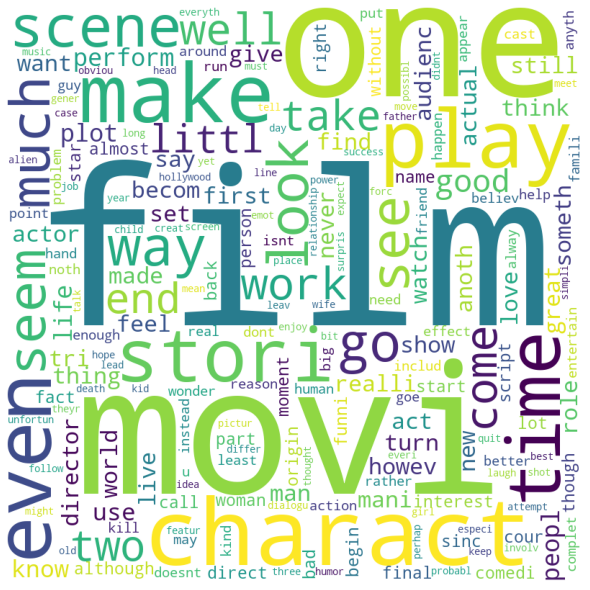

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(data['review']))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [48]:
data['label'].unique()

array(['pos', 'neg'], dtype=object)

In [49]:
data['review']

0       film adapt comic book plenti success whether t...
1       everi movi come along suspect studio everi ind...
2       youv got mail work alot better deserv order ma...
3       jaw rare film grab attent show singl imag scre...
4       moviemak lot like gener manag nfl team postsal...
                              ...                        
1995    anyth stigma taken warn releas similarlythem f...
1996    john boorman zardoz goofi cinemat debacl funda...
1997    kid hall acquir tast took least season watch s...
1998    time john carpent great horror director cours ...
1999    two parti guy bob head haddaway danc hit love ...
Name: review, Length: 2000, dtype: object

## part2 Text categorisation 

In [ ]:
data

In [ ]:
#frequency distribution of the class attribute
print(pd.crosstab(index=data["label"],columns="count"))

In [57]:
data.columns

Index(['review', 'label'], dtype='object')

In [59]:
x=data['review']
y=data['label']

In [60]:
x

0       film adapt comic book plenti success whether t...
1       everi movi come along suspect studio everi ind...
2       youv got mail work alot better deserv order ma...
3       jaw rare film grab attent show singl imag scre...
4       moviemak lot like gener manag nfl team postsal...
                              ...                        
1995    anyth stigma taken warn releas similarlythem f...
1996    john boorman zardoz goofi cinemat debacl funda...
1997    kid hall acquir tast took least season watch s...
1998    time john carpent great horror director cours ...
1999    two parti guy bob head haddaway danc hit love ...
Name: review, Length: 2000, dtype: object

#### DECOUPAGE EN TRAIN ET TEST **

In [61]:
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(data,train_size=0.8,random_state=1,stratify=data['label'])

In [62]:
Train

,review,label
1957,recent one night young director name baz luhrm...,neg
1800,four movi earn jami lee curti titl scream quee...,neg
1956,godzilla ultim culmin care plot summer movi lo...,neg
752,youv probabl heard one priest rabbi never dosa...,pos
1525,one indic bad film hype rememb film case box h...,neg
...,...,...
1499,best thing fact good thing say dark citi made ...,neg
1211,tim robbin martin lawernc team road movi comed...,neg
852,selfproclaim profession film critic somewhat e...,pos
544,matter suspect isnt usual action thriller usua...,pos


### Generate the document term matrix - train set

In [63]:
Train = Train.fillna(' ')

In [64]:
#*** Generate the document term matrix - train set ***

#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer

#instantiation of the objet
parseur = CountVectorizer(min_df=0.1)

#create the document term matrix
XTrain = parseur.fit_transform(Train['review'])

In [65]:
#list of tokens
print(parseur.get_feature_names_out())

['abl' 'across' 'act' 'action' 'actor' 'actual' 'add' 'age' 'allow'
 'almost' 'along' 'alreadi' 'also' 'although' 'alway' 'american' 'anim'
 'anoth' 'anyon' 'anyth' 'appar' 'appear' 'arent' 'around' 'ask' 'attempt'
 'attent' 'audienc' 'away' 'back' 'bad' 'base' 'basic' 'beauti' 'becom'
 'begin' 'behind' 'believ' 'best' 'better' 'big' 'bit' 'black' 'bodi'
 'book' 'bore' 'boy' 'break' 'bring' 'brother' 'call' 'camera' 'cant'
 'car' 'care' 'career' 'carri' 'case' 'cast' 'certainli' 'chanc' 'chang'
 'charact' 'chase' 'child' 'citi' 'classic' 'clich' 'close' 'come'
 'comedi' 'comic' 'complet' 'consid' 'continu' 'convinc' 'could' 'coupl'
 'cours' 'creat' 'credit' 'critic' 'cut' 'dark' 'daughter' 'david' 'day'
 'dead' 'deal' 'death' 'decid' 'definit' 'deliv' 'despit' 'detail'
 'develop' 'dialogu' 'didnt' 'die' 'differ' 'direct' 'director'
 'disappoint' 'discov' 'doesnt' 'done' 'dont' 'drama' 'dramat' 'dream'
 'earli' 'effect' 'either' 'el' 'element' 'emot' 'end' 'enjoy' 'enough'
 'entertain' 

In [66]:
#mdt_bis
mdtTrain = XTrain.toarray()

In [67]:
frequency_matrix = pd.DataFrame(mdtTrain,columns=parseur.get_feature_names_out())
frequency_matrix

,abl,across,act,action,actor,actual,add,age,allow,almost,...,would,write,writer,written,wrong,ye,year,yet,young,your
0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,0,0
2,0,0,1,1,1,2,0,1,0,0,...,3,3,0,1,0,0,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,2,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,0,2,1,0,0,0,1,...,3,0,0,0,1,0,0,2,0,0
1596,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,1,0,0,0,2,0,0,0,0,2,...,1,1,0,0,0,1,1,0,0,0
1598,0,0,0,1,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### train the classifier

#### Knn 

In [68]:
#import the class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#instatiate the object
knn_classifier = KNeighborsClassifier(n_neighbors=2)

#perform the training process
knn_classifier.fit(mdtTrain,Train['label'])

KNeighborsClassifier(n_neighbors=2)

In [69]:
#generate the document term matrix for the test set
#using the object learned from the train set
#import the metrics class for the performance measurement
from sklearn import metrics

#create the document term matrix
mdtTest = parseur.transform(Test['review'])

In [70]:
#prediction for the test set
predTest = knn_classifier.predict(mdtTest)
#confusion matrix
print('***Confusion matrix')
mcTest= metrics.confusion_matrix(Test['label'],predTest)
print(mcTest)

***Confusion matrix
[[171  29]
 [148  52]]


In [71]:
#accuracy rate
print('accuracy rate -->')
print(metrics.accuracy_score(Test['label'],predTest))

accuracy rate -->
0.5575


In [73]:
#recall
print('Recall')
print(metrics.recall_score(Test['label'], predTest, pos_label='pos'))

Recall
0.26


In [86]:
#precision
print('precision')
print(metrics.precision_score(Test['label'],predTest,pos_label='pos'))

precision
0.7840909090909091


In [78]:
#F1-Score
print('F1-Score')
print(metrics.f1_score(Test['label'],predTest,pos_label='pos'))

F1-Score
0.37010676156583633


### LogistiRegression

In [95]:
#*** train the classifier

#import the class LogistiRegression
from sklearn.linear_model import LogisticRegression

#instatiate the object
modelBis = LogisticRegression()

#perform the training process
modelBis.fit(mdtTrain,Train['label'])

#generate the document term matrix for the test set
#using the object learned from the train set


#import the metrics class for the performance measurement
from sklearn import metrics


In [94]:
#accuracy rate
print('accuracy rate')
print(metrics.accuracy_score(Test['label'],predTest))

#recall
print('Recall')
print(metrics.recall_score(Test['label'],predTest, pos_label='pos'))

#precision
print('precision')
print(metrics.precision_score(Test['label'],predTest, pos_label='pos'))

#F1-Score
print('F1-Score')
print(metrics.f1_score(Test['label'],predTest, pos_label='pos'))

accuracy rate
0.75
Recall
0.69
precision
0.7840909090909091
F1-Score
0.7340425531914891


### Deployment

Une des finalités de la catégorisation de textes est de produire une fonction permettant
d’assigner automatiquement une classe (« spam » ou « ham ») à un nouveau document. Elle
peut être implémentée dans le logiciel de réception des messages SMS de votre
smartphone par exemple. Dans cette section, nous détaillons les différentes étapes des
opérations pour montrer que la tâche est loin d’être triviale.

Nous souhaitons classer la phrase « this is a new free service for you only »



Description compatible avec la matrice documents termes. Nous transformons le document en un vecteur de présence absence des termes présents dans le dictionnaire :

In [105]:
#document to classify
doc = ['i like this movie']

#get its description
desc = parseur.transform(doc)
print(desc)

  (0, 245)	1


In [106]:
#which terms
import numpy as np
print(np.asarray(parseur.get_feature_names_out())[desc.indices])

['like']


In [107]:
#dense representation
dense_desc = desc.toarray()
dense_desc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [108]:
dense_desc.sum()

1

In [110]:
#prediction of the class membership
pred_doc = knn_classifier.predict(dense_desc)
print(pred_doc)

['neg']
